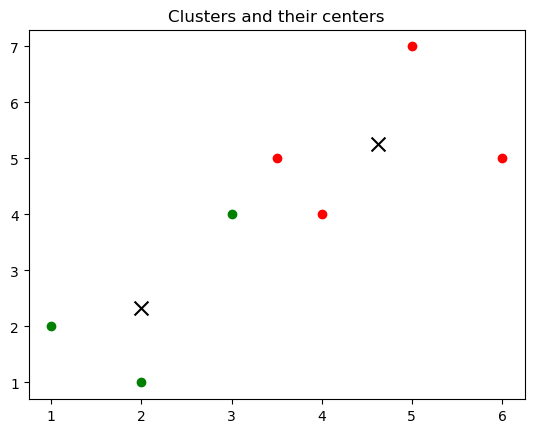

In [1]:
import random
import matplotlib.pyplot as plt

# Define a function to calculate Euclidean distance
def distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

# Define the k-Means algorithm
def k_means(data, centers, k):
    while True:
        clusters = [[] for _ in range(k)]

        # Assign data points to the closest center
        for point in data:
            distances = [distance(point, center) for center in centers]
            index = distances.index(min(distances))
            clusters[index].append(point)

        # Update centers to be the mean of points in a cluster
        new_centers = []
        for cluster in clusters:
            center = (sum([point[0] for point in cluster])/len(cluster),
                      sum([point[1] for point in cluster])/len(cluster))
            new_centers.append(center)

        # Break loop if centers don't change significantly
        if max([distance(new, old) for new, old in zip(new_centers, centers)]) < 0.0001:
            break
        else:
            centers = new_centers
    return clusters, centers

# Example dataset with 2D points
data = [(1, 2), (2, 1), (3, 4), (5, 7), (3.5, 5), (4, 4), (6, 5)]
k = 2  # Change this line to have 3 clusters
centers = random.sample(data, k)  # Initialize centers

# Run k-Means algorithm
clusters, centers = k_means(data, centers, k)

# Plotting clusters and their centers using matplotlib
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

# Plot the data points and assign a color based on the cluster they belong to
for i, cluster in enumerate(clusters):
    for point in cluster:
        ax.scatter(*point, color=colors[i])

# Plot the centers as black x marks
for center in centers:
    ax.scatter(*center, color='black', marker='x', s=100)

# Show the plot with title
ax.set_title('Clusters and their centers')
plt.show()